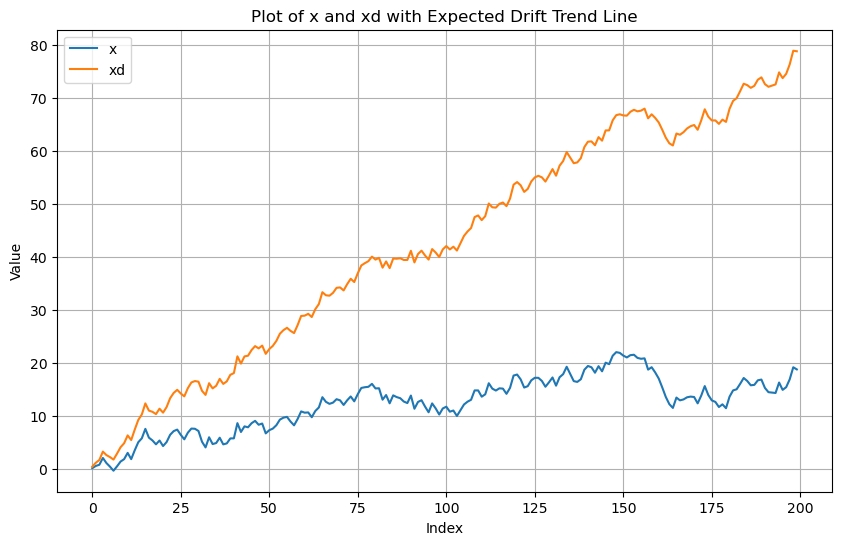

In [67]:
import numpy as np
import matplotlib.pyplot as plt

w = np.random.normal(loc=0, scale=1, size=200)
x = np.cumsum(w)
wd = w + 0.3
xd = np.cumsum(wd)

plt.figure(figsize=(10, 6))
plt.plot(x, label='x')
plt.plot(xd, label='xd')


plt.legend()
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Plot of x and xd with Expected Drift Trend Line')
plt.grid(True)
plt.show()


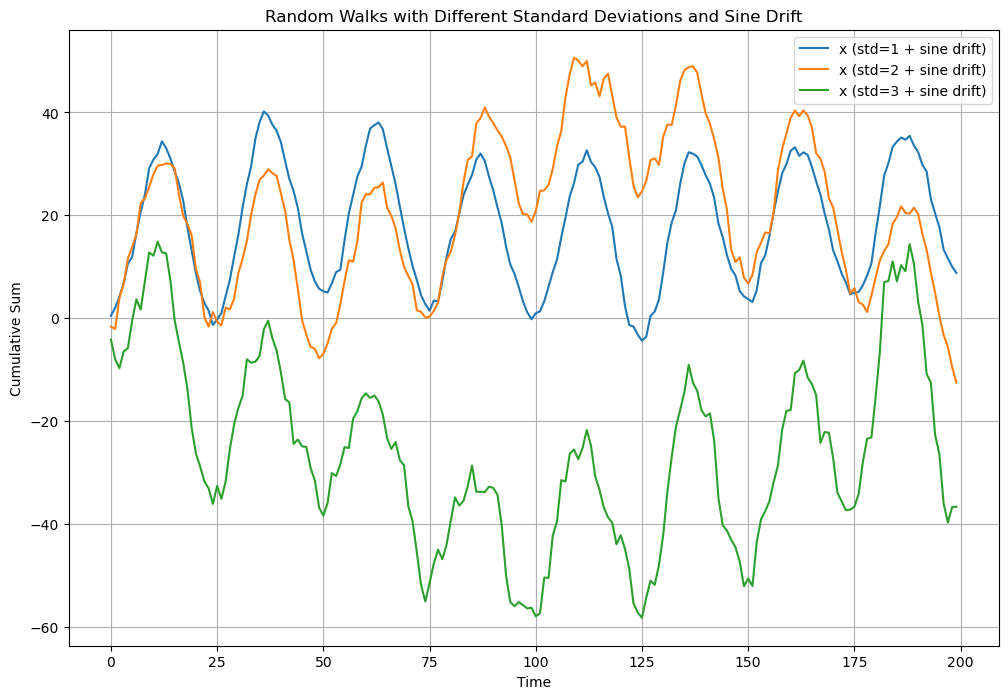

In [68]:
import numpy as np
import matplotlib.pyplot as plt

def generate_random_walk_with_sine_drift(std, t):
    w = np.random.normal(loc=0, scale=std, size=len(t))
    sine_drift = 4 * np.sin(2 * np.pi * t / 25)
    wd = w + sine_drift
    return np.cumsum(wd)

t = np.arange(200)  # Time points

# Generate random walks with sine drift for each std deviation
x1 = generate_random_walk_with_sine_drift(1, t)
x2 = generate_random_walk_with_sine_drift(2, t)
x3 = generate_random_walk_with_sine_drift(3, t)

plt.figure(figsize=(12, 8))
plt.plot(x1, label='x (std=1 + sine drift)')
plt.plot(x2, label='x (std=2 + sine drift)')
plt.plot(x3, label='x (std=3 + sine drift)')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Cumulative Sum')
plt.title('Random Walks with Different Standard Deviations and Sine Drift')
plt.grid(True)
plt.show()


In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from astsadata import *

Coefficient of determination (R^2): 0.5706221962094157
Intercept: 3.634936873241468
Slope: [0.02107488]


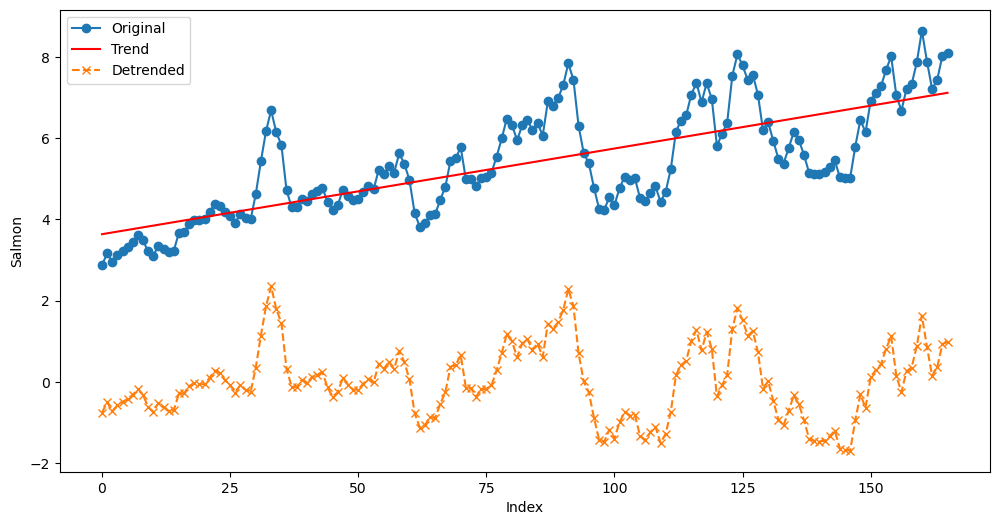

In [70]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Add numeric index to use as predictor for regression
salmon['index_num'] = range(len(salmon))
x = salmon['index_num'].values.reshape(-1, 1)
y = salmon['value'].values

# Fit linear regression
model = LinearRegression().fit(x, y)
print("Coefficient of determination (R^2):", model.score(x, y))
print("Intercept:", model.intercept_)
print("Slope:", model.coef_)

# Calculate trend using the model
trend = model.predict(x)

# Detrend by subtracting the trend from original values
salmon['detrended'] = y - trend

# Plot original and detrended
plt.figure(figsize=(12, 6))
plt.plot(salmon['index_num'], y, marker='o', label='Original')
plt.plot(salmon['index_num'], trend, color='red', label='Trend')
plt.plot(salmon['index_num'], salmon['detrended'], marker='x', linestyle='--', label='Detrended')
plt.xlabel('Index')
plt.ylabel('Salmon')
plt.legend()
plt.show()


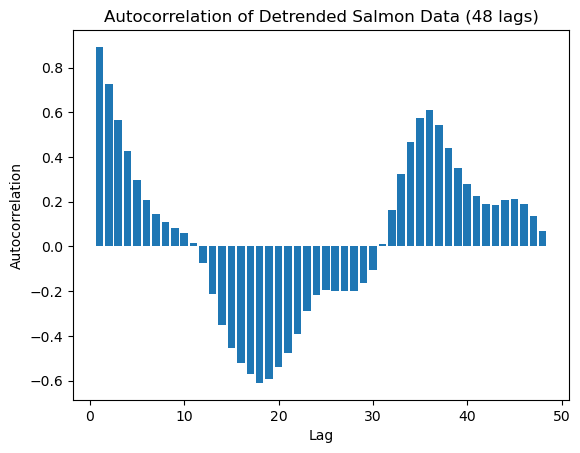

In [71]:
import matplotlib.pyplot as plt

# Calculate autocorrelations for lags 1 to 48
autocorrelations = [salmon['detrended'].autocorr(lag=lag) for lag in range(1, 49)]

# Plot autocorrelation function (ACF)
plt.bar(range(1, 49), autocorrelations)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of Detrended Salmon Data (48 lags)')
plt.show()


Coefficient of determination (R^2): 0.5706221962094157
Intercept: 3.634936873241468
Slope: [0.02107488]


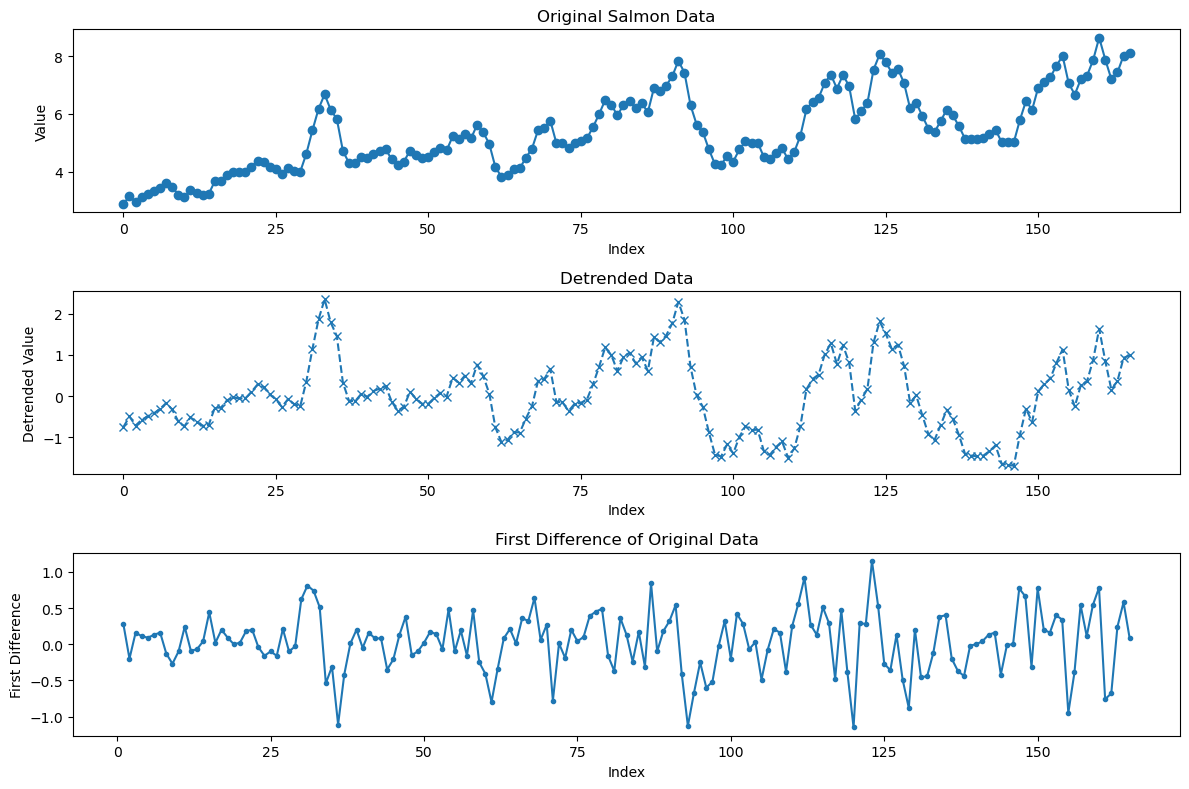

In [72]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Add numeric index for regression
salmon['index_num'] = range(len(salmon))
x = salmon['index_num'].values.reshape(-1, 1)
y = salmon['value'].values

# Fit linear regression
model = LinearRegression().fit(x, y)
print("Coefficient of determination (R^2):", model.score(x, y))
print("Intercept:", model.intercept_)
print("Slope:", model.coef_)

# Calculate trend using the model
trend = model.predict(x)

# Detrend by subtracting the trend
salmon['detrended'] = y - trend

# Calculate first difference on original data
salmon['first_diff'] = salmon['value'].diff()

# Plot original, detrended, and first differenced data
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(salmon['index_num'], y, marker='o')
plt.title('Original Salmon Data')
plt.xlabel('Index')
plt.ylabel('Value')

plt.subplot(3, 1, 2)
plt.plot(salmon['index_num'], salmon['detrended'], marker='x', linestyle='--')
plt.title('Detrended Data')
plt.xlabel('Index')
plt.ylabel('Detrended Value')

plt.subplot(3, 1, 3)
plt.plot(salmon['index_num'], salmon['first_diff'], marker='.', linestyle='-')
plt.title('First Difference of Original Data')
plt.xlabel('Index')
plt.ylabel('First Difference')

plt.tight_layout()
plt.show()


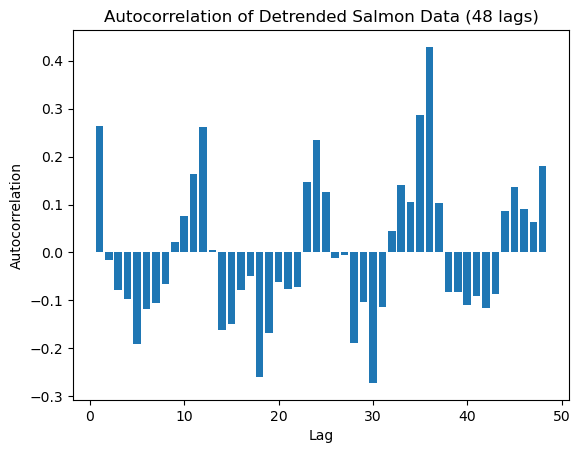

In [73]:
import matplotlib.pyplot as plt

# Calculate autocorrelations for lags 1 to 48
autocorrelations = [salmon['first_diff'].autocorr(lag=lag) for lag in range(1, 49)]

# Plot autocorrelation function (ACF)
plt.bar(range(1, 49), autocorrelations)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of Detrended Salmon Data (48 lags)')
plt.show()


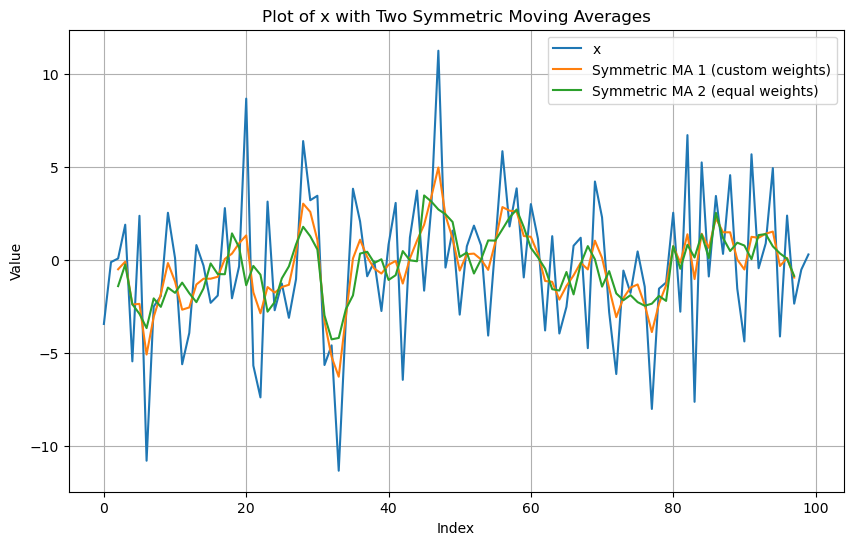

In [74]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
w = np.random.normal(loc=0, scale=4, size=100)
#x = np.cumsum(w)
x = w

# Define symmetric weights
weights_sm1 = np.array([1/10, 1/5, 2/5, 1/5, 1/10])
weights_sm2 = np.array([1/5] * 5)

# Calculate symmetric moving averages using convolution
sm1 = np.convolve(x, weights_sm1, mode='valid')
sm2 = np.convolve(x, weights_sm2, mode='valid')

# Plot original series and the two symmetric moving averages
plt.figure(figsize=(10, 6))
plt.plot(x, label='x')
plt.plot(np.arange(2, len(x)-2), sm1, label='Symmetric MA 1 (custom weights)')
plt.plot(np.arange(2, len(x)-2), sm2, label='Symmetric MA 2 (equal weights)')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Plot of x with Two Symmetric Moving Averages')
plt.grid(True)
plt.show()


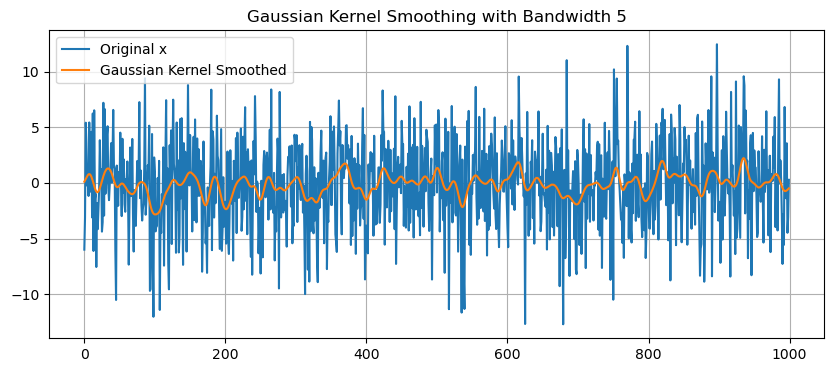

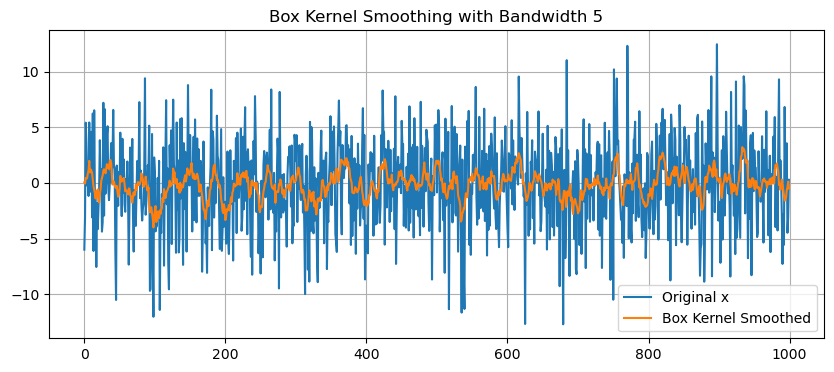

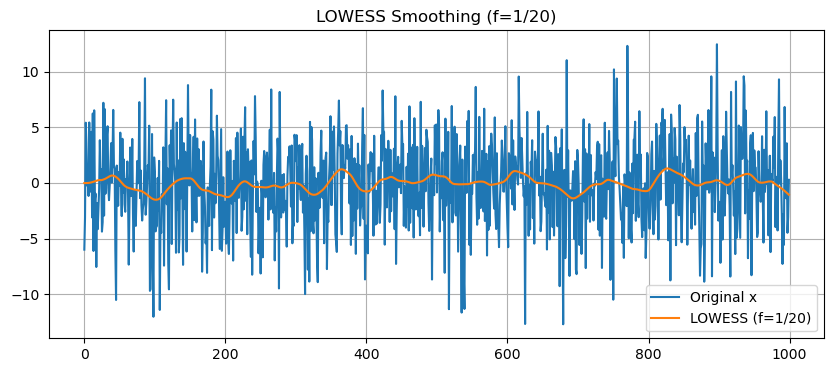

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve
from statsmodels.nonparametric.smoothers_lowess import lowess

# Generate sample data
w = np.random.normal(loc=0, scale=4, size=1000)
x = w

# Bandwidth for kernels
bandwidth = 5

def gaussian_kernel(bw):
    size = bw * 6  # cover +-3 sigma roughly
    x_vals = np.arange(-size // 2, size // 2 + 1)
    kernel = np.exp(-(x_vals**2) / (2 * (bw**2)))
    return kernel / kernel.sum()

def box_kernel(bw):
    size = bw * 2 + 1
    kernel = np.ones(size)
    return kernel / kernel.sum()

# Create kernels
g_kernel = gaussian_kernel(bandwidth)
b_kernel = box_kernel(bandwidth)

# Smooth the series with convolution
smooth_gaussian = convolve(x, g_kernel, mode='same')
smooth_box = convolve(x, b_kernel, mode='same')

# LOWESS moving average (fraction f=1/20)
f_lowess = 1/20
lowess_x = np.arange(len(x))
lowess_y = lowess(x, lowess_x, frac=f_lowess, return_sorted=False)

# Plot Gaussian kernel smoothed series
plt.figure(figsize=(10, 4))
plt.plot(x, label='Original x')
plt.plot(smooth_gaussian, label='Gaussian Kernel Smoothed')
plt.legend()
plt.title('Gaussian Kernel Smoothing with Bandwidth 5')
plt.grid(True)
plt.show()

# Plot Box kernel smoothed series
plt.figure(figsize=(10, 4))
plt.plot(x, label='Original x')
plt.plot(smooth_box, label='Box Kernel Smoothed')
plt.legend()
plt.title('Box Kernel Smoothing with Bandwidth 5')
plt.grid(True)
plt.show()

# Plot LOWESS smoothing as its own chart
plt.figure(figsize=(10, 4))
plt.plot(x, label='Original x')
plt.plot(lowess_y, label='LOWESS (f=1/20)')
plt.legend()
plt.title('LOWESS Smoothing (f=1/20)')
plt.grid(True)
plt.show()


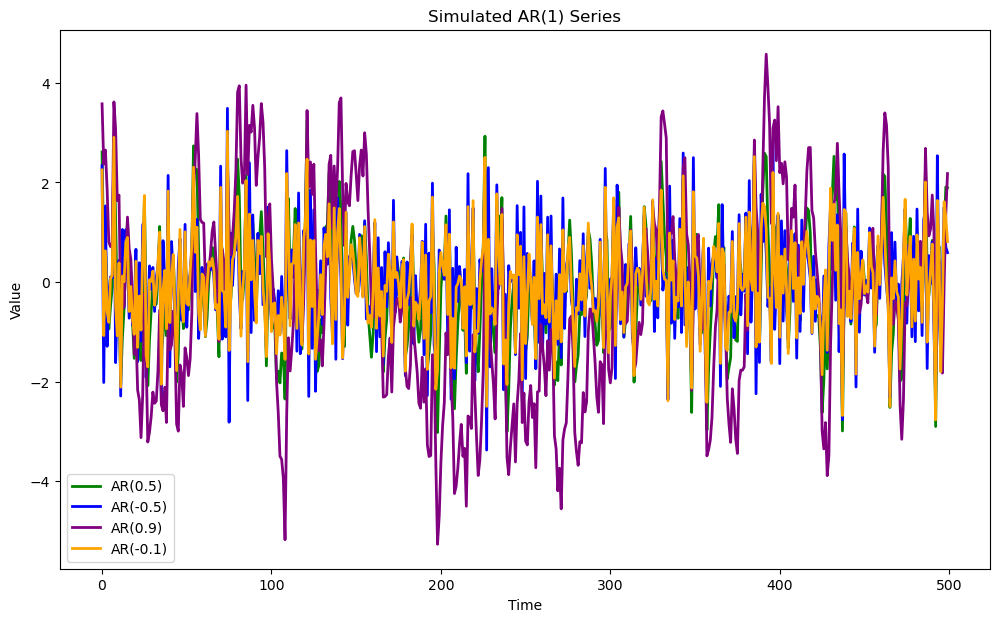

<Figure size 900x600 with 0 Axes>

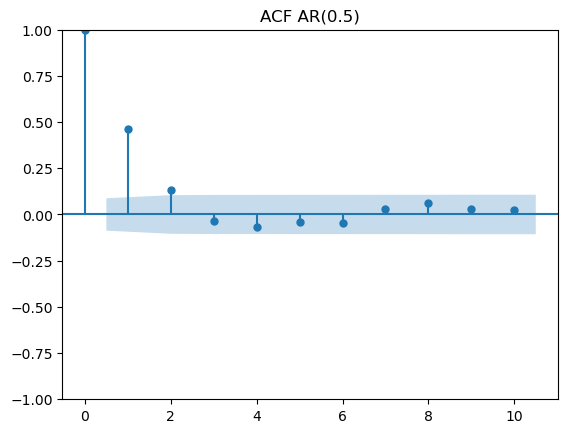

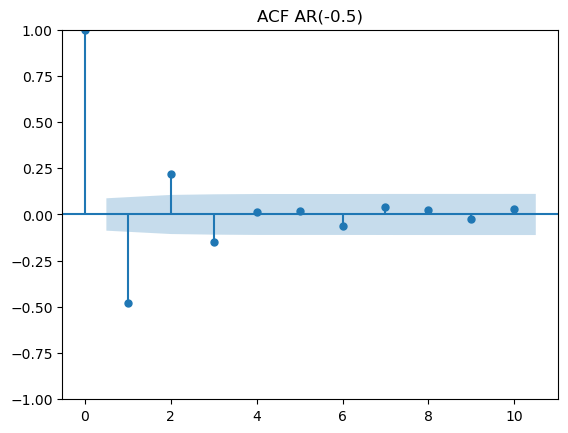

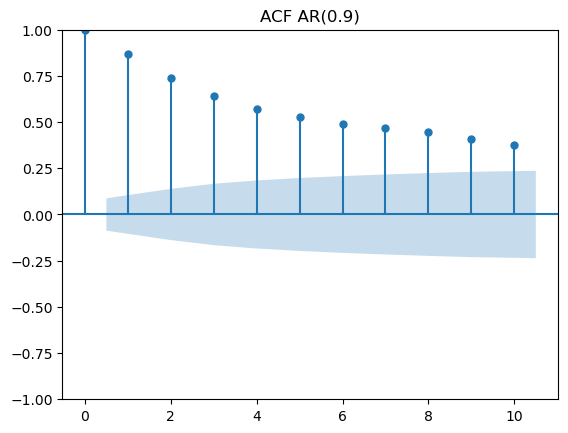

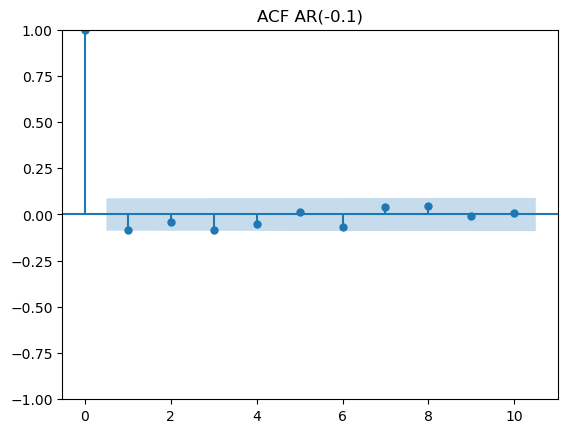

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf

# Generate white noise as innovations (same for all processes)
w = np.random.normal(0, 1, 550)

# Function to simulate AR(1) process using provided innovations
def ar1_process(phi, w):
    ar = np.array([1, -phi])
    ma = np.array([1])
    AR_object = ArmaProcess(ar, ma)
    def noise_gen(size):
        # Ensures size is an integer, not a tuple
        if isinstance(size, tuple):
            size = size[0]
        return w[:size]
    return AR_object.generate_sample(nsample=550, scale=1, distrvs=noise_gen)

# Simulate with requested coefficients, discard burn-in (first 50 samples)
ar1 = ar1_process(0.5, w)[50:550]
ar2 = ar1_process(-0.5, w)[50:550]
ar3 = ar1_process(0.9, w)[50:550]
ar4 = ar1_process(-0.1, w)[50:550]

# Plot all time series
plt.figure(figsize=(12, 7))
plt.plot(ar1, label='AR(0.5)', linewidth=2, color='green')
plt.plot(ar2, label='AR(-0.5)', linewidth=2, color='blue')
plt.plot(ar3, label='AR(0.9)', linewidth=2, color='purple')
plt.plot(ar4, label='AR(-0.1)', linewidth=2, color='orange')
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Simulated AR(1) Series")
plt.legend()
plt.show()

# Plot ACF for each process, lag 10
plt.figure(figsize=(9,6))
plot_acf(ar1, lags=10, title='ACF AR(0.5)')
plt.show()
plot_acf(ar2, lags=10, title='ACF AR(-0.5)')
plt.show()
plot_acf(ar3, lags=10, title='ACF AR(0.9)')
plt.show()
plot_acf(ar4, lags=10, title='ACF AR(-0.1)')
plt.show()


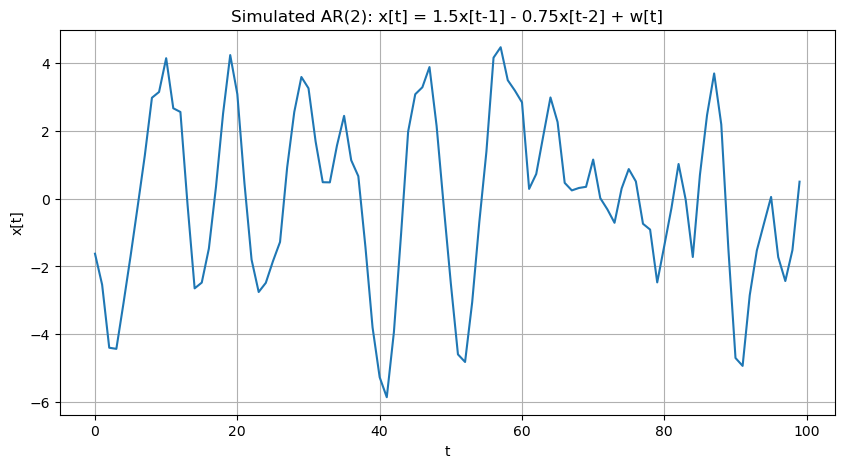

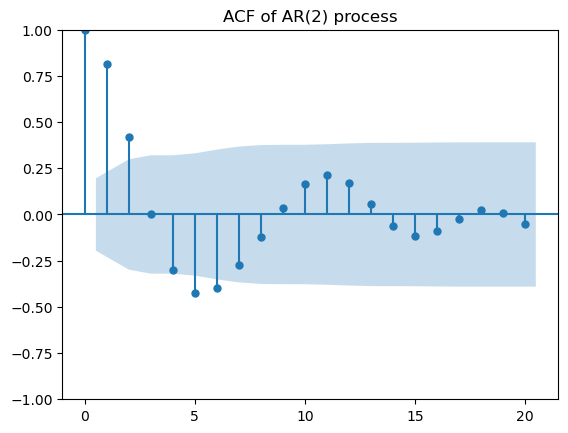

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf

# AR: x_t = 1.5 x_{t-1} - 0.75 x_{t-2} + w_t
ar = np.array([1, -1.5, 0.75])  # lag polynomial: +1, then -phi1, then -phi2
ma = np.array([1])              # no MA terms

np.random.seed(55)
arma_process = ArmaProcess(ar, ma)

n = 100
samples = arma_process.generate_sample(nsample=n)

plt.figure(figsize=(10,5))
plt.plot(samples)
plt.title("Simulated AR(2): x[t] = 1.5x[t-1] - 0.75x[t-2] + w[t]")
plt.xlabel("t")
plt.ylabel("x[t]")
plt.grid()
plt.show()

plot_acf(samples, lags=20, title='ACF of AR(2) process')
plt.show()


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  500
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -699.056
Date:                Sun, 26 Oct 2025   AIC                           1406.113
Time:                        22:24:24   BIC                           1422.971
Sample:                             0   HQIC                          1412.728
                                - 500                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9538      0.044    112.846      0.000       4.868       5.040
ar.L1         -0.5814      0.674     -0.863      0.388      -1.902       0.740
ma.L1          0.5425      0.699      0.777      0.4

/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


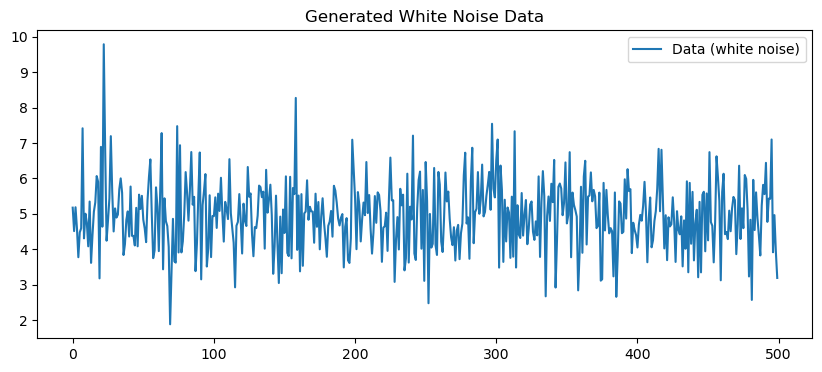

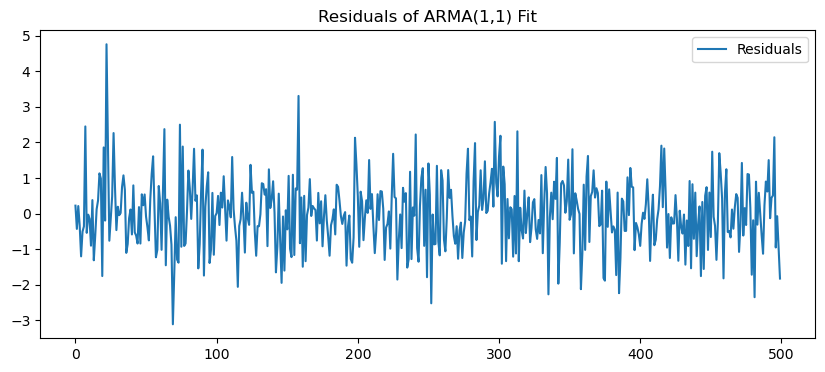

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Generate white noise as innovations
w = np.random.normal(5, 1, 500)

# Fit ARMA(1,1) model using ARIMA with d=0
model = ARIMA(w, order=(1, 0, 1))
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

# Plot original data
plt.figure(figsize=(10, 4))
plt.plot(w, label='Data (white noise)')
plt.title('Generated White Noise Data')
plt.legend()
plt.show()

# Plot residuals
residuals = model_fit.resid
plt.figure(figsize=(10, 4))
plt.plot(residuals, label='Residuals')
plt.title('Residuals of ARMA(1,1) Fit')
plt.legend()
plt.show()


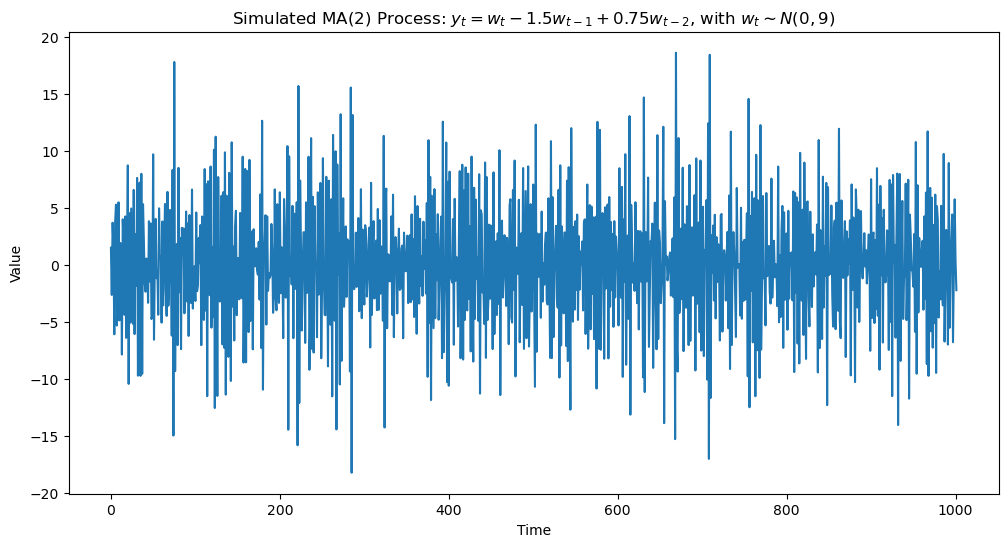

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess

# Set the random seed for reproducibility
np.random.seed(42)

# No AR terms, so just 1 for zero lag
ar = np.array([1])

# MA polynomial with zero lag 1, and coefficients for lags 1 and 2:
# y_t = w_t - 1.5 w_{t-1} + 0.75 w_{t-2}
ma = np.array([1, -1.5, 0.75])

# Create MA process
ma_process = ArmaProcess(ar, ma)

# Generate 1002 points with noise innovation N(0,9) (std dev = 3)
n_samples = 1002
y = ma_process.generate_sample(nsample=n_samples, scale=np.sqrt(9))

# Plot the simulated data
plt.figure(figsize=(12, 6))
plt.plot(y)
plt.title("Simulated MA(2) Process: $y_t = w_t - 1.5 w_{t-1} + 0.75 w_{t-2}$, with $w_t \\sim N(0,9)$")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()


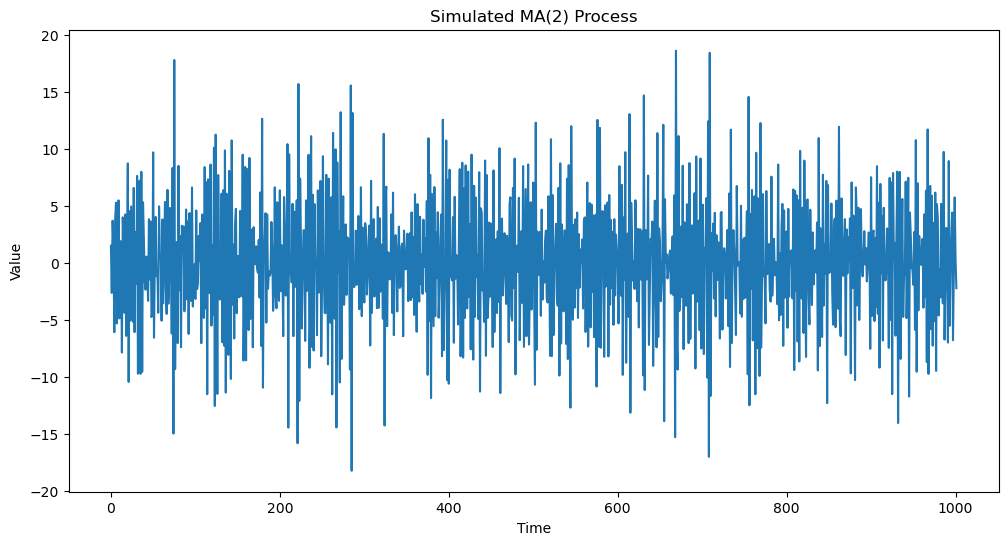

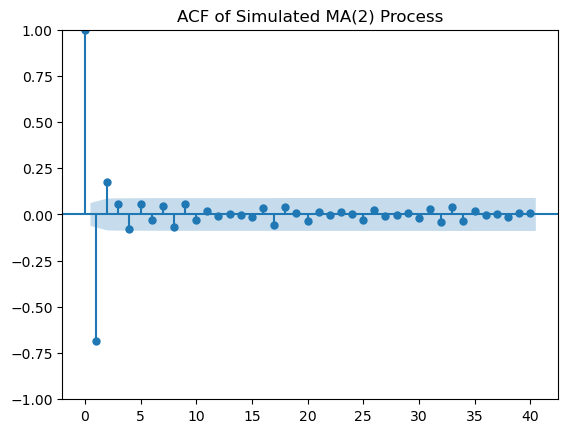

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf

# Set the random seed for reproducibility
np.random.seed(42)

# MA polynomial coefficients for process y_t = w_t - 1.5 w_{t-1} + 0.75 w_{t-2}
ar = np.array([1])  # No AR terms
ma = np.array([1, -1.5, 0.75])

# Create the MA process
ma_process = ArmaProcess(ar, ma)

# Generate 1002 points with noise N(0,9)
n_samples = 1002
y = ma_process.generate_sample(nsample=n_samples, scale=np.sqrt(9))

# Plot the simulated data
plt.figure(figsize=(12, 6))
plt.plot(y)
plt.title("Simulated MA(2) Process")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

# Plot the ACF of the simulated data
plot_acf(y, lags=40)
plt.title("ACF of Simulated MA(2) Process")
plt.show()


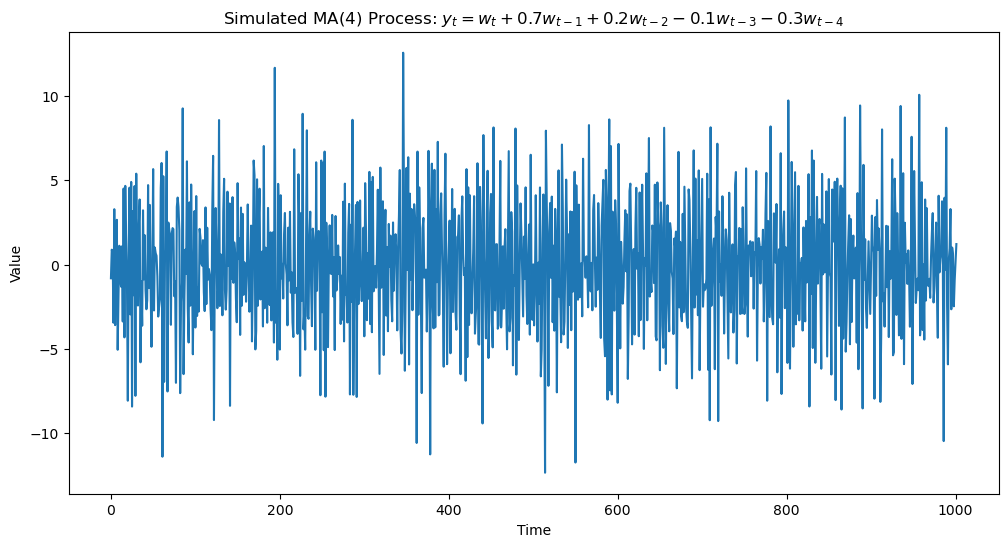

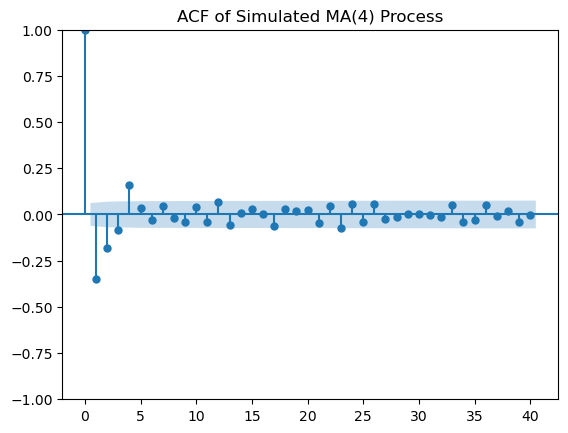

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf

# Set random seed for reproducibility
np.random.seed(41)

# No AR terms
ar = np.array([1])

# MA terms - note the sign convention for MA is reversed from the equation
# Equation: y_t = w_t + 0.7 w_{t-1} + 0.2 w_{t-2} - 0.1 w_{t-3} - 0.3 w_{t-4}
ma = np.array([1, -0.7, -0.2, 0.1, 0.3])

# Create MA(4) process
ma_process = ArmaProcess(ar, ma)

# Generate sample of length 1002 with white noise variance 9 (std dev 3)
y = ma_process.generate_sample(nsample=1002, scale=np.sqrt(9))

# Plot simulated data
plt.figure(figsize=(12, 6))
plt.plot(y)
plt.title("Simulated MA(4) Process: $y_t = w_t + 0.7 w_{t-1} + 0.2 w_{t-2} - 0.1 w_{t-3} - 0.3 w_{t-4}$")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

# Plot the ACF of the simulated data
plot_acf(y, lags=40)
plt.title("ACF of Simulated MA(4) Process")
plt.show()


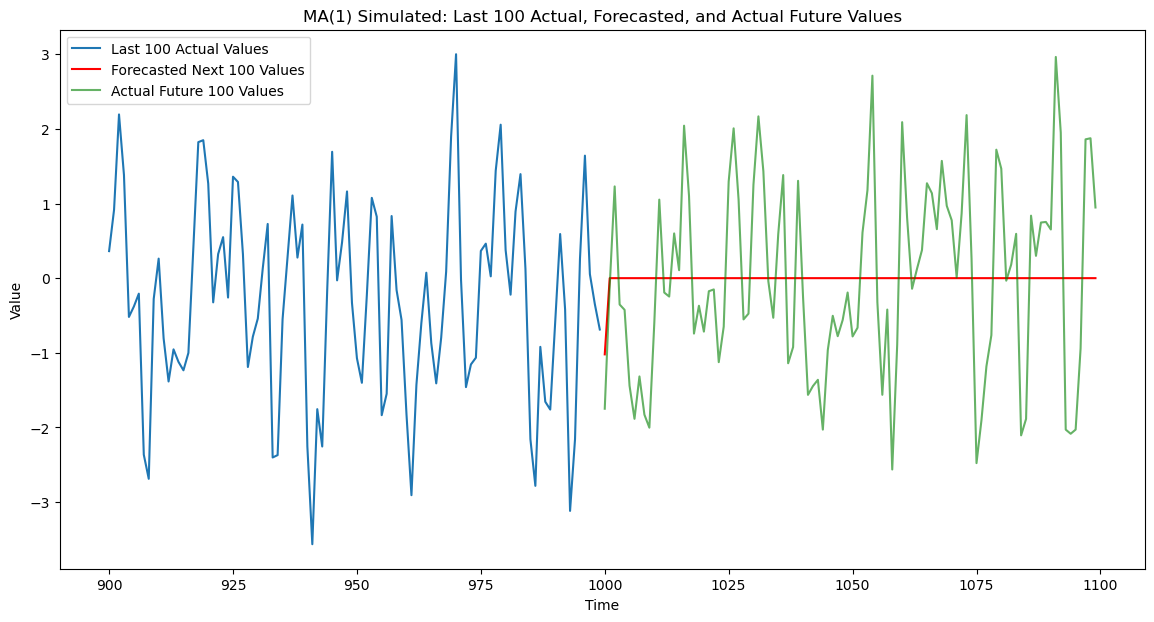

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess

# Set seed for reproducibility
np.random.seed(123)

# Define MA(1) process using ArmaProcess for simulation
ma_coefficient = 0.9
ar = np.array([1])  # AR part order 0
ma = np.array([1, ma_coefficient])  # MA(1) with coefficient 0.9
ma_process = ArmaProcess(ar, ma)

# Generate sample data of length n + forecast_steps to get actual future values
n = 1000
forecast_steps = 100
total_length = n + forecast_steps
simulated_data = ma_process.generate_sample(nsample=total_length)

# Split into observed and 'future' actuals
your_time_series = pd.Series(simulated_data[:n])
actual_future = pd.Series(simulated_data[n:])

# Fit an MA(1) SARIMAX model on observed data
model = SARIMAX(your_time_series, order=(0, 0, 1), seasonal_order=(0, 0, 0, 0),
                enforce_stationarity=False, enforce_invertibility=False)
fit = model.fit(disp=False)

# Forecast next forecast_steps points
forecast = fit.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean

# Indices for plotting
actual_index = range(n - 100, n)
forecast_index = range(n, n + forecast_steps)

# Plot last 100 actual, forecasted 100, and actual future 100
plt.figure(figsize=(14, 7))
plt.plot(actual_index, your_time_series[-100:], label='Last 100 Actual Values')
plt.plot(forecast_index, forecast_mean, label='Forecasted Next 100 Values', color='red')
plt.plot(forecast_index, actual_future, label='Actual Future 100 Values', color='green', alpha=0.6)
plt.title('MA(1) Simulated: Last 100 Actual, Forecasted, and Actual Future Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:               SARIMAX(0, 0, 4)   Log Likelihood               -1413.676
Date:                Sun, 26 Oct 2025   AIC                           2837.352
Time:                        22:24:24   BIC                           2861.866
Sample:                             0   HQIC                          2846.671
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.9258      0.033     27.889      0.000       0.861       0.991
ma.L2          0.0250      0.044      0.563      0.574      -0.062       0.112
ma.L3          0.0126      0.043      0.290      0.7

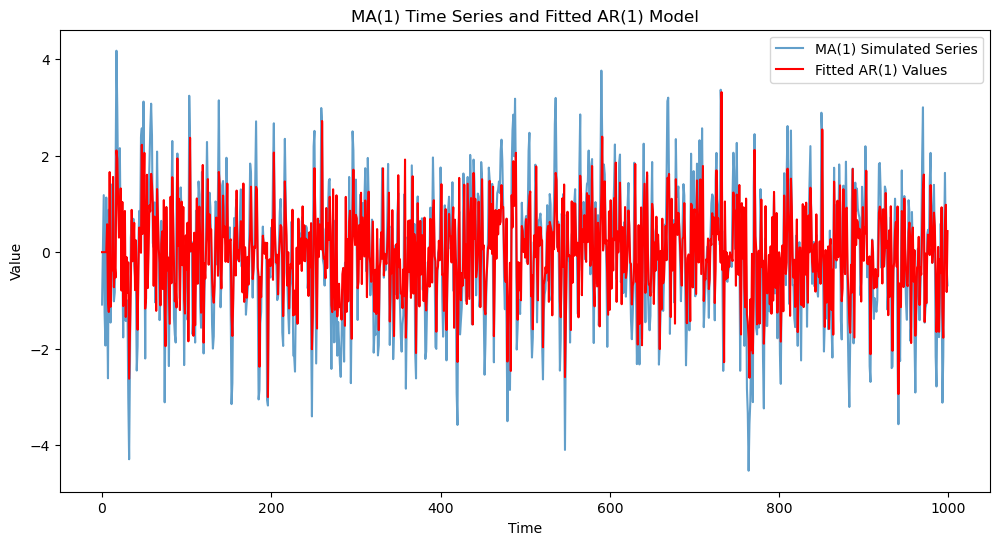

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Set seed for reproducibility
np.random.seed(123)

# Generate white noise series of length n
n = 1000
white_noise = np.random.normal(loc=0, scale=1, size=n)

# Create MA(1) process with MA coefficient 0.9
ma_coefficient = 0.9
ma_series = white_noise.copy()
for t in range(1, n):
    ma_series[t] = white_noise[t] + ma_coefficient * white_noise[t-1]

# Convert to pandas Series for convenience
your_time_series = pd.Series(ma_series)

# Fit an AR(1) model (order = (1,0,0)) to the MA(1) series
model = SARIMAX(your_time_series, order=(0, 0, 4), seasonal_order=(0, 0, 0, 0),
                enforce_stationarity=False, enforce_invertibility=False)

fit = model.fit(disp=False)

# Print the estimated AR(1) coefficient and other parameters
print(fit.summary())

# Plot original MA(1) time series and fitted values from AR(1) model
plt.figure(figsize=(12, 6))
plt.plot(your_time_series, label='MA(1) Simulated Series', alpha=0.7)

# Fitted values from the AR(1) model
plt.plot(fit.fittedvalues, color='red', label='Fitted AR(1) Values')

plt.title('MA(1) Time Series and Fitted AR(1) Model')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


In [84]:
import numpy as np
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg

# Set seed for reproducibility
np.random.seed(42)

# Generate dataset with AR(1) process: y_t = -0.9 * y_{t-1} + noise
noise = np.random.normal(loc=0, scale=3, size=1000)
data = np.zeros(1000)
data[0] = noise[0]
for t in range(1, 1000):
    data[t] = -0.9 * data[t-1] + noise[t]

# Fit AR(1) model
model = AutoReg(data, lags=1, old_names=False)
result = model.fit()

# Forecast next 10 datapoints
forecast = result.predict(start=len(data), end=len(data)+9)
print(forecast)


[ 2.08961316 -1.78118889  1.62183725 -1.36994243  1.26028881 -1.05208613
  0.98084458 -0.80641198  0.76485948 -0.6165281 ]


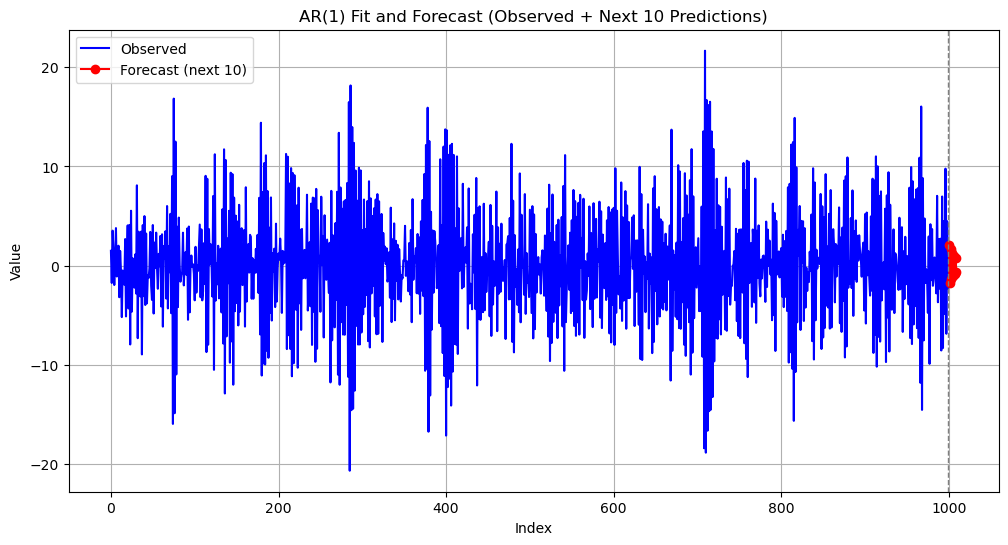

In [85]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'data' and 'forecast' are from the previous code
x_data = np.arange(len(data))
x_forecast = np.arange(len(data), len(data)+len(forecast))

plt.figure(figsize=(12, 6))
plt.plot(x_data, data, label='Observed', color='blue')
plt.plot(x_forecast, forecast, label='Forecast (next 10)', color='red', marker='o')
plt.axvline(len(data)-1, color='gray', linestyle='--', linewidth=1)
plt.legend()
plt.title('AR(1) Fit and Forecast (Observed + Next 10 Predictions)')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)
plt.show()


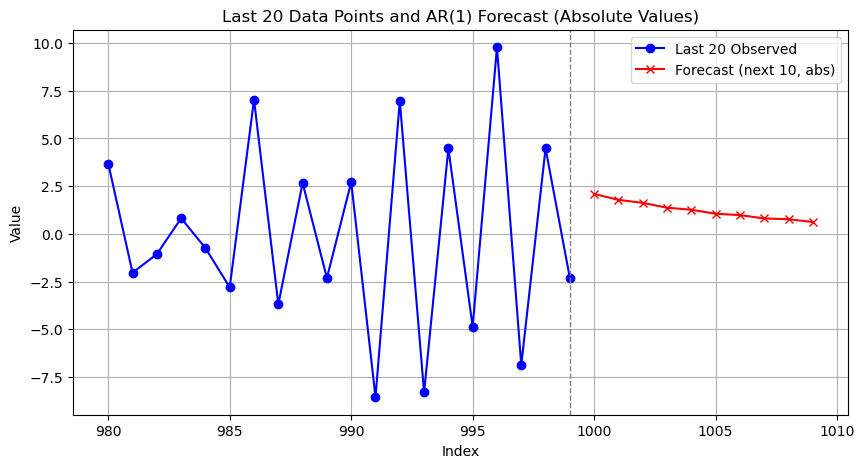

In [86]:
import matplotlib.pyplot as plt
import numpy as np

# Last 20 actual values
last_20_values = data[-20:]
x_actual = np.arange(len(data) - 20, len(data))

# Forecast values and their indices
x_forecast = np.arange(len(data), len(data) + len(forecast))

plt.figure(figsize=(10, 5))
plt.plot(x_actual, last_20_values, label='Last 20 Observed', color='blue', marker='o')
plt.plot(x_forecast, np.abs(forecast), label='Forecast (next 10, abs)', color='red', marker='x')
plt.axvline(len(data) - 1, color='gray', linestyle='--', linewidth=1)
plt.title('Last 20 Data Points and AR(1) Forecast (Absolute Values)')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


In [87]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Set seed for reproducibility
np.random.seed(42)

# Generate dataset from ARMA(1,1) process
noise = np.random.normal(loc=0, scale=3, size=1000)
data = np.zeros(1000)
data[0] = noise[0]
for t in range(1, 1000):
    data[t] = -0.9 * data[t-1] + 0.2 * noise[t-1] + noise[t]

# Fit ARMA(1,1) model using ARIMA (d=0)
model = ARIMA(data, order=(1, 0, 1))
result = model.fit()

# Print model summary
print(result.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -2495.008
Date:                Sun, 26 Oct 2025   AIC                           4998.015
Time:                        22:24:25   BIC                           5017.646
Sample:                             0   HQIC                          5005.476
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0359      0.058      0.618      0.537      -0.078       0.150
ar.L1         -0.8676      0.020    -42.775      0.000      -0.907      -0.828
ma.L1          0.1610      0.039      4.101      0.0

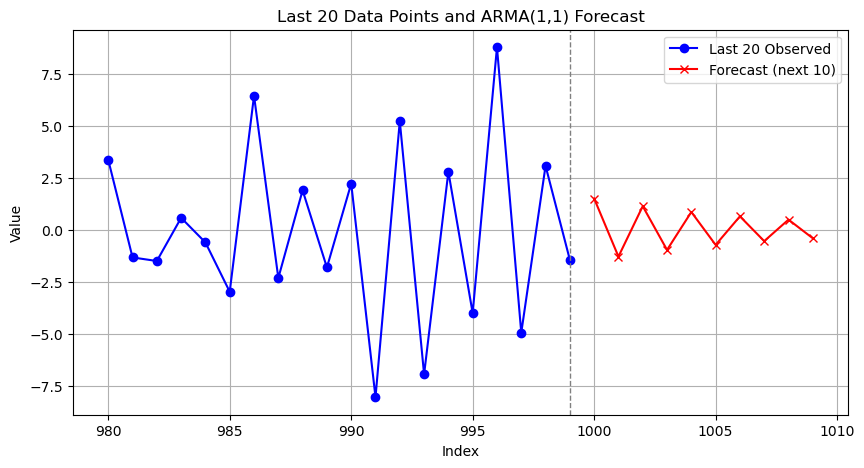

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Set seed for reproducibility
np.random.seed(42)

# Generate dataset with ARMA(1,1) process:
# x_t = -0.9 * x_{t-1} + 0.2 * w_{t-1} + w_t, where w ~ N(0, 3^2)
noise = np.random.normal(loc=0, scale=3, size=1000)
data = np.zeros(1000)
data[0] = noise[0]
for t in range(1, 1000):
    data[t] = -0.9 * data[t-1] + 0.2 * noise[t-1] + noise[t]

# Fit ARMA(1,1) model (ARIMA with (1,0,1))
model = ARIMA(data, order=(1, 0, 1))
result = model.fit()

# Forecast next 10 datapoints
forecast = result.forecast(steps=10)

# Prepare indices for plotting
x_actual = np.arange(len(data) - 20, len(data))
last_20_values = data[-20:]
x_forecast = np.arange(len(data), len(data) + 10)

# Plot observed last 20 points and forecast
plt.figure(figsize=(10, 5))
plt.plot(x_actual, last_20_values, label='Last 20 Observed', color='blue', marker='o')
plt.plot(x_forecast, forecast, label='Forecast (next 10)', color='red', marker='x')
plt.axvline(len(data) - 1, color='gray', linestyle='--', linewidth=1)
plt.title('Last 20 Data Points and ARMA(1,1) Forecast')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


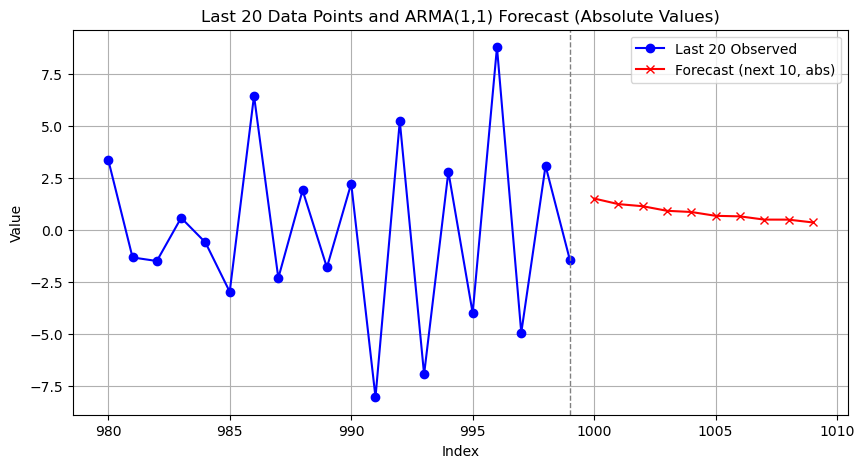

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Set seed for reproducibility
np.random.seed(42)

# Generate dataset with ARMA(1,1) process:
noise = np.random.normal(loc=0, scale=3, size=1000)
data = np.zeros(1000)
data[0] = noise[0]
for t in range(1, 1000):
    data[t] = -0.9 * data[t-1] + 0.2 * noise[t-1] + noise[t]

# Fit ARMA(1,1) model (ARIMA with (1,0,1))
model = ARIMA(data, order=(1, 0, 1))
result = model.fit()

# Forecast next 10 datapoints
forecast = result.forecast(steps=10)

# Prepare indices for plotting
x_actual = np.arange(len(data) - 20, len(data))
last_20_values = data[-20:]
x_forecast = np.arange(len(data), len(data) + 10)

# Plot observed last 20 points and forecast with abs values
plt.figure(figsize=(10, 5))
plt.plot(x_actual, last_20_values, label='Last 20 Observed', color='blue', marker='o')
plt.plot(x_forecast, np.abs(forecast), label='Forecast (next 10, abs)', color='red', marker='x')
plt.axvline(len(data) - 1, color='gray', linestyle='--', linewidth=1)
plt.title('Last 20 Data Points and ARMA(1,1) Forecast (Absolute Values)')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


<Figure size 1000x500 with 0 Axes>

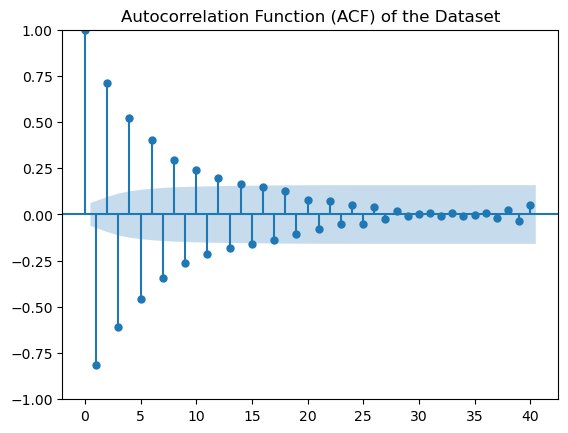

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf

# Set seed for reproducibility
np.random.seed(42)

# Generate dataset with ARMA(1,1) process:
noise = np.random.normal(loc=0, scale=3, size=1000)
data = np.zeros(1000)
data[0] = noise[0]
for t in range(1, 1000):
    data[t] = -0.9 * data[t-1] + 0.2 * noise[t-1] + noise[t]

# Fit ARMA(1,1) model
model = ARIMA(data, order=(1, 0, 1))
result = model.fit()

# Plot ACF
plt.figure(figsize=(10, 5))
plot_acf(data, lags=40, alpha=0.05)
plt.title('Autocorrelation Function (ACF) of the Dataset')
plt.show()


<Figure size 1000x500 with 0 Axes>

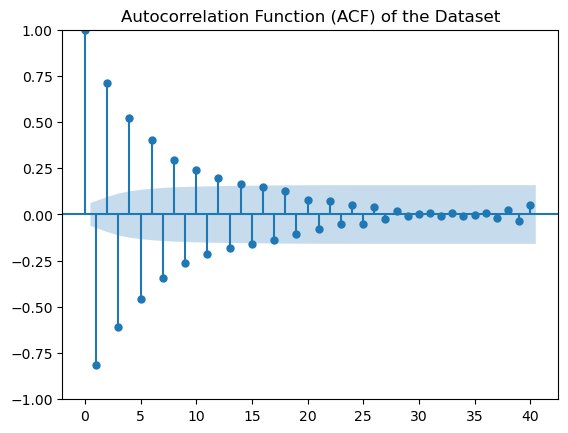

<Figure size 1000x500 with 0 Axes>

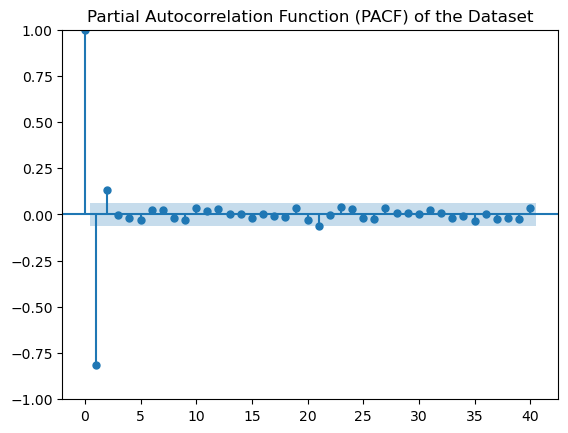

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Set seed for reproducibility
np.random.seed(42)

# Generate dataset with ARMA(1,1) process:
noise = np.random.normal(loc=0, scale=3, size=1000)
data = np.zeros(1000)
data[0] = noise[0]
for t in range(1, 1000):
    data[t] = -0.9 * data[t-1] + 0.2 * noise[t-1] + noise[t]

# Fit ARMA(1,1) model
model = ARIMA(data, order=(1, 0, 1))
result = model.fit()

# Plot ACF
plt.figure(figsize=(10, 5))
plot_acf(data, lags=40, alpha=0.05)
plt.title('Autocorrelation Function (ACF) of the Dataset')
plt.show()

# Plot PACF
plt.figure(figsize=(10, 5))
plot_pacf(data, lags=40, alpha=0.05, method='ywm')
plt.title('Partial Autocorrelation Function (PACF) of the Dataset')
plt.show()


[ 5.59742175  9.29595648  9.53447796  6.94673085  9.7396241  11.31356564
 14.89433852 17.43502573 21.63323659 19.49229574]


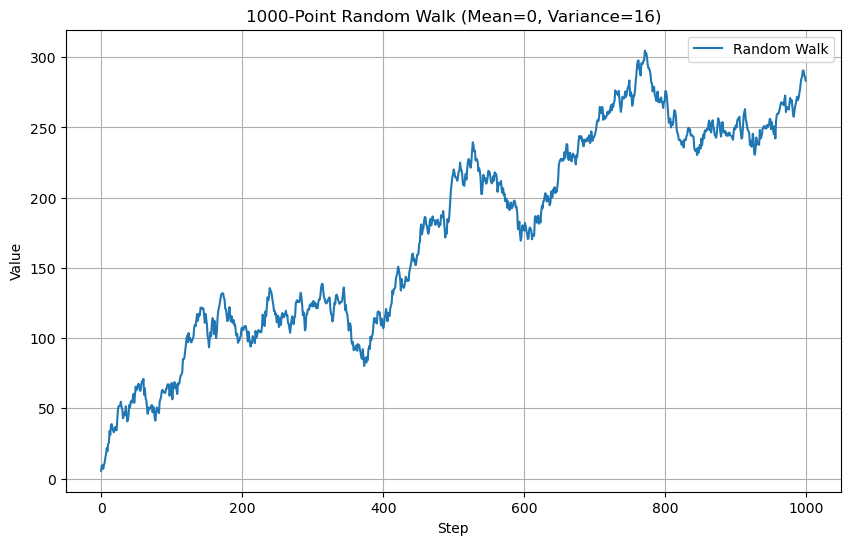

In [92]:
import matplotlib.pyplot as plt
import numpy as np

num_points = 1000
mean = 0
variance = 16
std_dev = np.sqrt(variance)

increments = np.random.normal(loc=mean, scale=std_dev, size=num_points)
random_walk = np.cumsum(increments)

print(random_walk[:10])  # example output of first 10 points
plt.figure(figsize=(10, 6))
plt.plot(random_walk, label='Random Walk')
plt.title('1000-Point Random Walk (Mean=0, Variance=16)')
plt.xlabel('Step')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


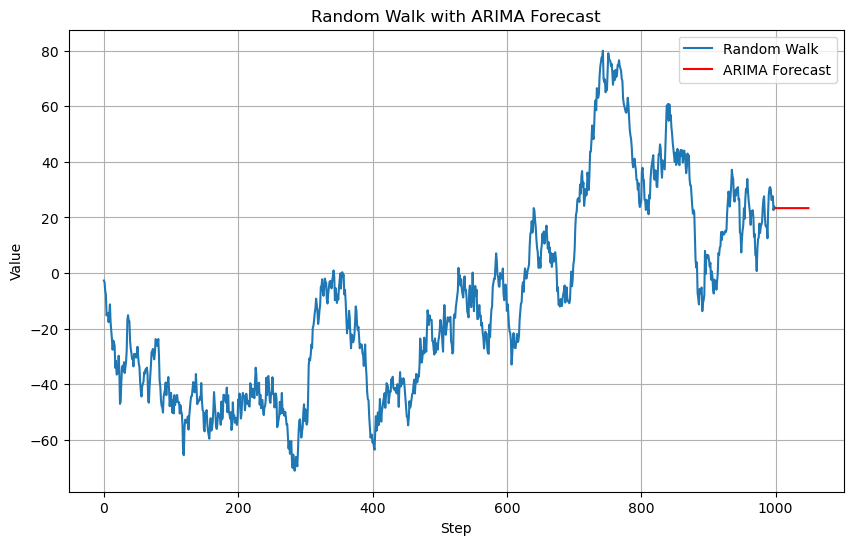

In [93]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Your existing code to generate random walk
num_points = 1000
mean = 0
variance = 16
std_dev = np.sqrt(variance)

increments = np.random.normal(loc=mean, scale=std_dev, size=num_points)
random_walk = np.cumsum(increments)

# Fit an ARIMA model (e.g., order=(1,1,0))
model = ARIMA(random_walk, order=(1,1,0))
model_fit = model.fit()

# Forecast the next 50 points
forecast_steps = 50
forecast = model_fit.forecast(steps=forecast_steps)

# Plot original data and forecast
plt.figure(figsize=(10, 6))
plt.plot(random_walk, label='Random Walk')
plt.plot(np.arange(num_points, num_points + forecast_steps), forecast, color='red', label='ARIMA Forecast')
plt.title('Random Walk with ARIMA Forecast')
plt.xlabel('Step')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


         value
index         
1947Q1  1488.9
1947Q2  1496.9
1947Q3  1500.5
1947Q4  1524.3
1948Q1  1546.6


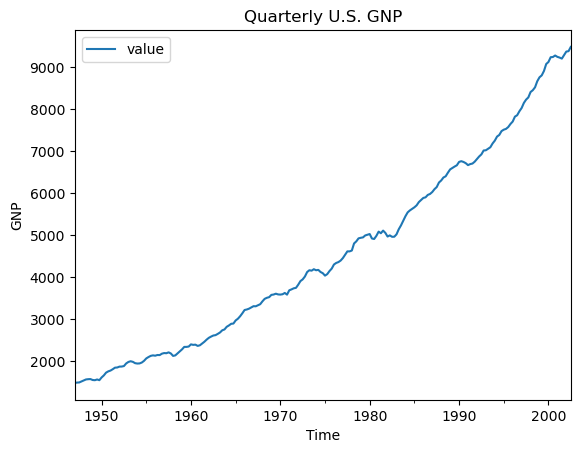

,value
index,
1947Q1,1488.9
1947Q2,1496.9
1947Q3,1500.5
1947Q4,1524.3
1948Q1,1546.6


In [94]:
# First, install the package if not installed
# !pip install astsadata

import astsadata

# Load the GNP dataset
gnp = astsadata.gnp

# Check the data
print(gnp.head())

import matplotlib.pyplot as plt

gnp.plot()
plt.title("Quarterly U.S. GNP")
plt.ylabel("GNP")
plt.xlabel("Time")
plt.show()
gnp.head(5)

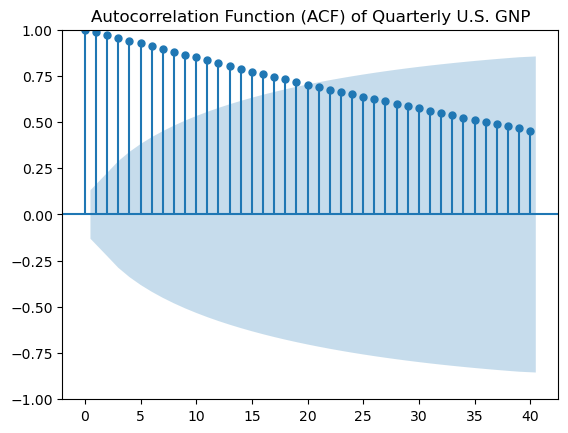

In [95]:
import astsadata
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(gnp, lags=40)  # You can change lags if needed
plt.title("Autocorrelation Function (ACF) of Quarterly U.S. GNP")
plt.show()

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  223
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 698.522
Date:                Sun, 26 Oct 2025   AIC                          -1393.044
Time:                        22:24:25   BIC                          -1386.238
Sample:                    03-31-1947   HQIC                         -1390.296
                         - 09-30-2002                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6113      0.056     10.906      0.000       0.501       0.721
sigma2         0.0001   7.63e-06     14.161      0.000    9.31e-05       0.000
Ljung-Box (L1) (Q):                  15.88   Jarque-

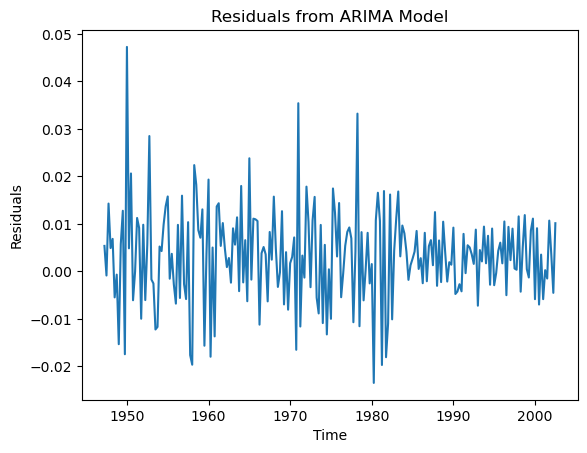

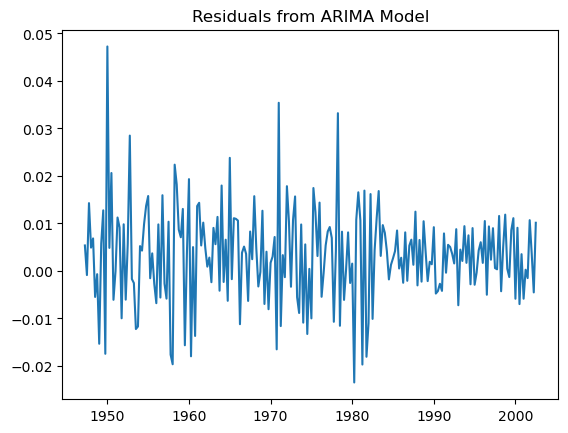

Forecast for next 5 periods:
2002Q4    9.163280
2003Q1    9.167291
2003Q2    9.169742
2003Q3    9.171241
2003Q4    9.172157
Freq: Q-DEC, Name: predicted_mean, dtype: float64


In [96]:
import astsadata
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import numpy as np 

# Load the GNP dataset
gnp = np.log(astsadata.gnp)


# Fit an ARIMA model
# Here order=(p,d,q), for example p=1, d=1, q=1
model = ARIMA(gnp, order=(1,1,0))
model_fit = model.fit()

# Print the summary of the model fit
print(model_fit.summary())

# Plot the residuals
residuals = model_fit.resid
import matplotlib.pyplot as plt

residuals = model_fit.resid

# Convert the residual index to datetime or string for plotting
residuals.index = residuals.index.to_timestamp()  # if the index is PeriodIndex with frequency
residuals = residuals.iloc[1:]
plt.plot(residuals.index, residuals.values)
plt.title("Residuals from ARIMA Model")
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.show()

plt.plot(residuals)
plt.title("Residuals from ARIMA Model")
plt.show()

# Optional: Forecast the next 5 periods
forecast = model_fit.forecast(steps=5)
print("Forecast for next 5 periods:")
print(forecast)


This is definitely a log, but we could tell by running an acf to find ar structure and then do the qq plot  

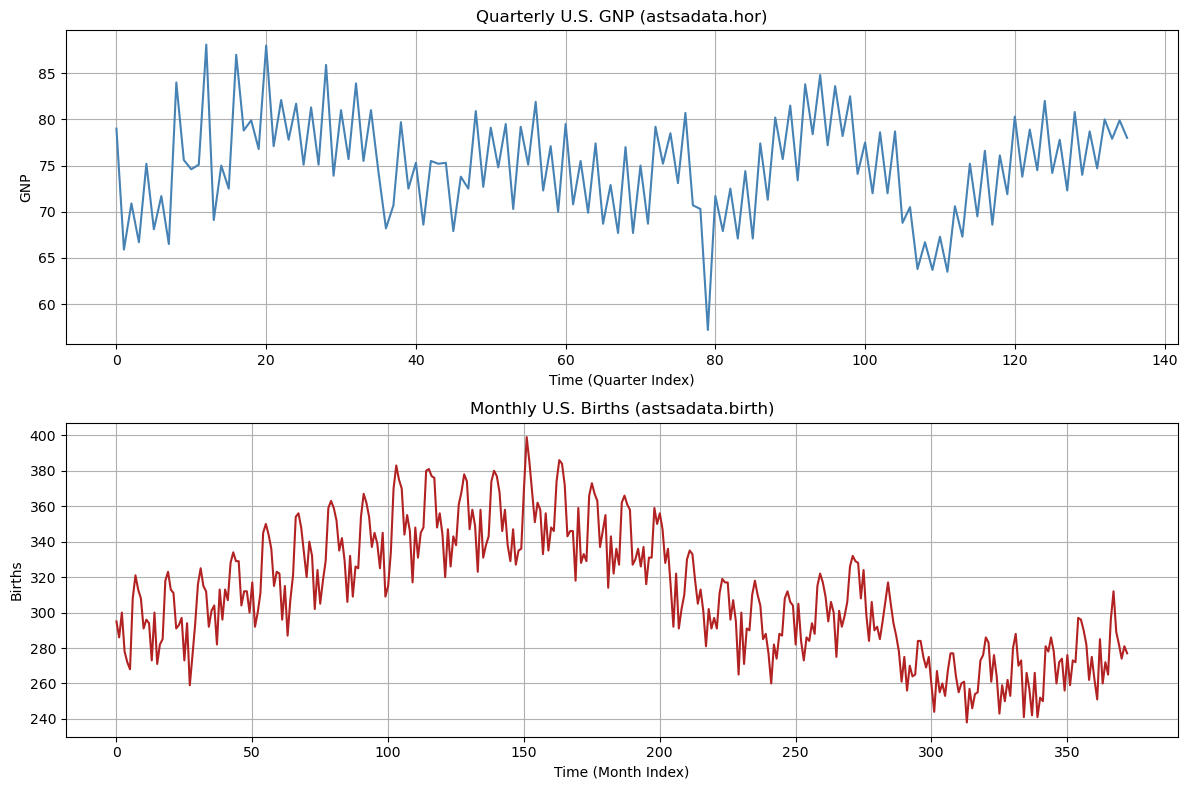

In [97]:
import astsadata
import matplotlib.pyplot as plt
import numpy as np

# Load the datasets
data_gnp = astsadata.hor      # Quarterly GNP
data_birth = astsadata.birth  # Monthly Births

# Prepare x-axes
time_gnp = np.arange(len(data_gnp))
time_birth = np.arange(len(data_birth))

# Create two subplots — one for each dataset
fig, axs = plt.subplots(2, 1, figsize=(12, 8))

# Plot GNP data
axs[0].plot(time_gnp, data_gnp, color='steelblue')
axs[0].set_title("Quarterly U.S. GNP (astsadata.hor)")
axs[0].set_xlabel("Time (Quarter Index)")
axs[0].set_ylabel("GNP")
axs[0].grid(True)

# Plot Births data
axs[1].plot(time_birth, data_birth, color='firebrick')
axs[1].set_title("Monthly U.S. Births (astsadata.birth)")
axs[1].set_xlabel("Time (Month Index)")
axs[1].set_ylabel("Births")
axs[1].grid(True)

# Adjust layout for readability
plt.tight_layout()
plt.show()


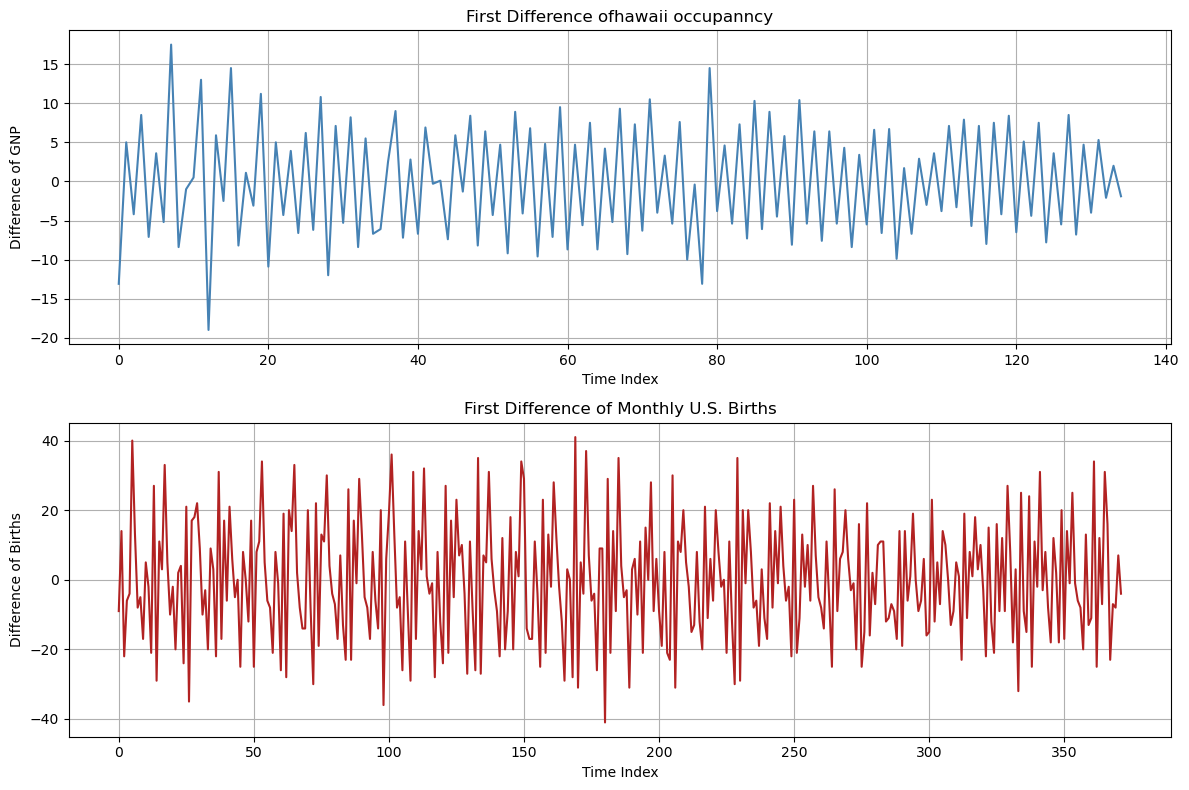

In [98]:
import astsadata
import matplotlib.pyplot as plt
import numpy as np

# Load the datasets
data_gnp = astsadata.hor      # Quarterly GNP
data_birth = astsadata.birth  # Monthly Births

# Compute first differences
diff_gnp = data_gnp.diff().dropna()
diff_birth = data_birth.diff().dropna()

# Prepare x-axes for differenced data
time_gnp_diff = np.arange(len(diff_gnp))
time_birth_diff = np.arange(len(diff_birth))

# Create two subplots — one for each differenced dataset
fig, axs = plt.subplots(2, 1, figsize=(12, 8))

# Plot differenced GNP data
axs[0].plot(time_gnp_diff, diff_gnp, color='steelblue')
axs[0].set_title("First Difference ofhawaii occupanncy")
axs[0].set_xlabel("Time Index")
axs[0].set_ylabel("Difference of GNP")
axs[0].grid(True)

# Plot differenced Births data
axs[1].plot(time_birth_diff, diff_birth, color='firebrick')
axs[1].set_title("First Difference of Monthly U.S. Births")
axs[1].set_xlabel("Time Index")
axs[1].set_ylabel("Difference of Births")
axs[1].grid(True)

# Adjust layout for readability
plt.tight_layout()
plt.show()


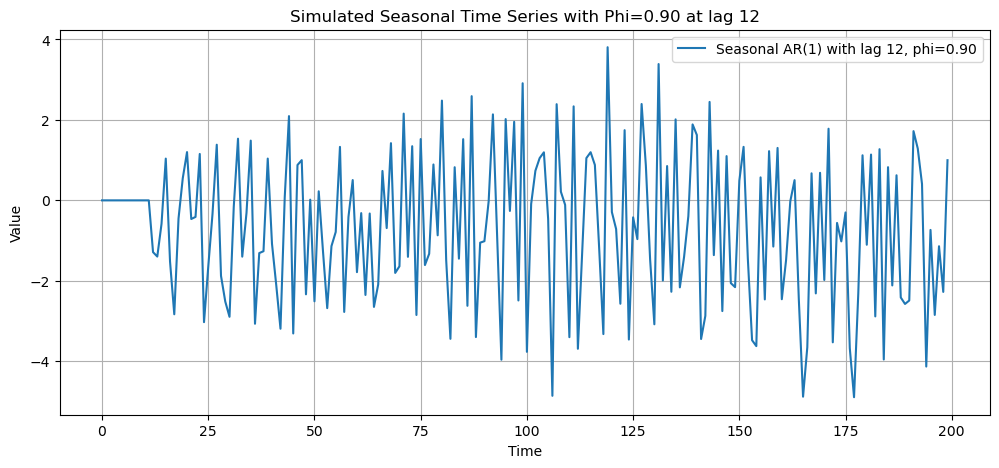

In [99]:
import numpy as np
import matplotlib.pyplot as plt


n = 200  # length of the series
phi = 0.90
seasonal_lag = 12

# Initialize the series with zeros
series = np.zeros(n)

# Generate white noise
noise_std = 1
noise = np.random.normal(0, noise_std, n)

# Simulate the seasonal AR(1) at lag 12 process
for t in range(seasonal_lag, n):
    series[t] = phi * series[t - seasonal_lag] + noise[t]

# Plot the series
plt.figure(figsize=(12, 5))
plt.plot(series, label="Seasonal AR(1) with lag 12, phi=0.90")
plt.title("Simulated Seasonal Time Series with Phi=0.90 at lag 12")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.legend()
plt.show()
